In [1]:
import numpy as np
import astropy.units as u
from astropy.io import fits
import time 
from importlib import reload
import copy
from datetime import datetime
today = int(datetime.today().strftime('%Y%m%d'))

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle, Rectangle

import poppy

from aefc_vortex.math_module import xp, xcipy, ensure_np_array
from aefc_vortex import utils
from aefc_vortex.imshows import imshow1, imshow2, imshow3, plot_data
from aefc_vortex import dm
from aefc_vortex import props
from aefc_vortex import aefc_1dm as adefc
import aefc_vortex.pwp as pwp
import aefc_vortex.scoob_model as scoobm

wavelength_c = 633e-9
npix = 1000


/opt/conda/envs/km310env/lib/python3.10/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


# SCoOB Setup Fig

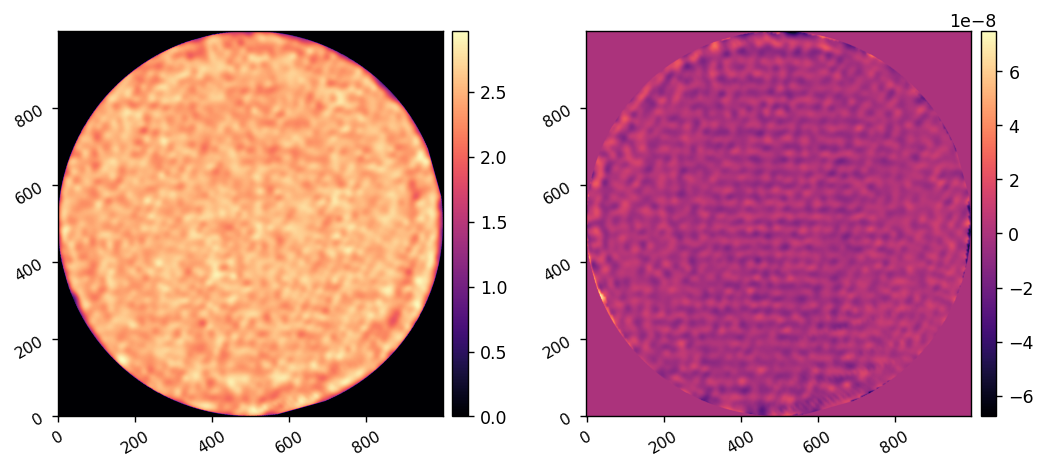

In [2]:

data = utils.load_pickle('data/20250121_fdpr2_prefpm_ref_processed.pkl')
wfe_amp = data['amp']
wfe_opd = data['opd']
imshow2(wfe_amp, wfe_opd)

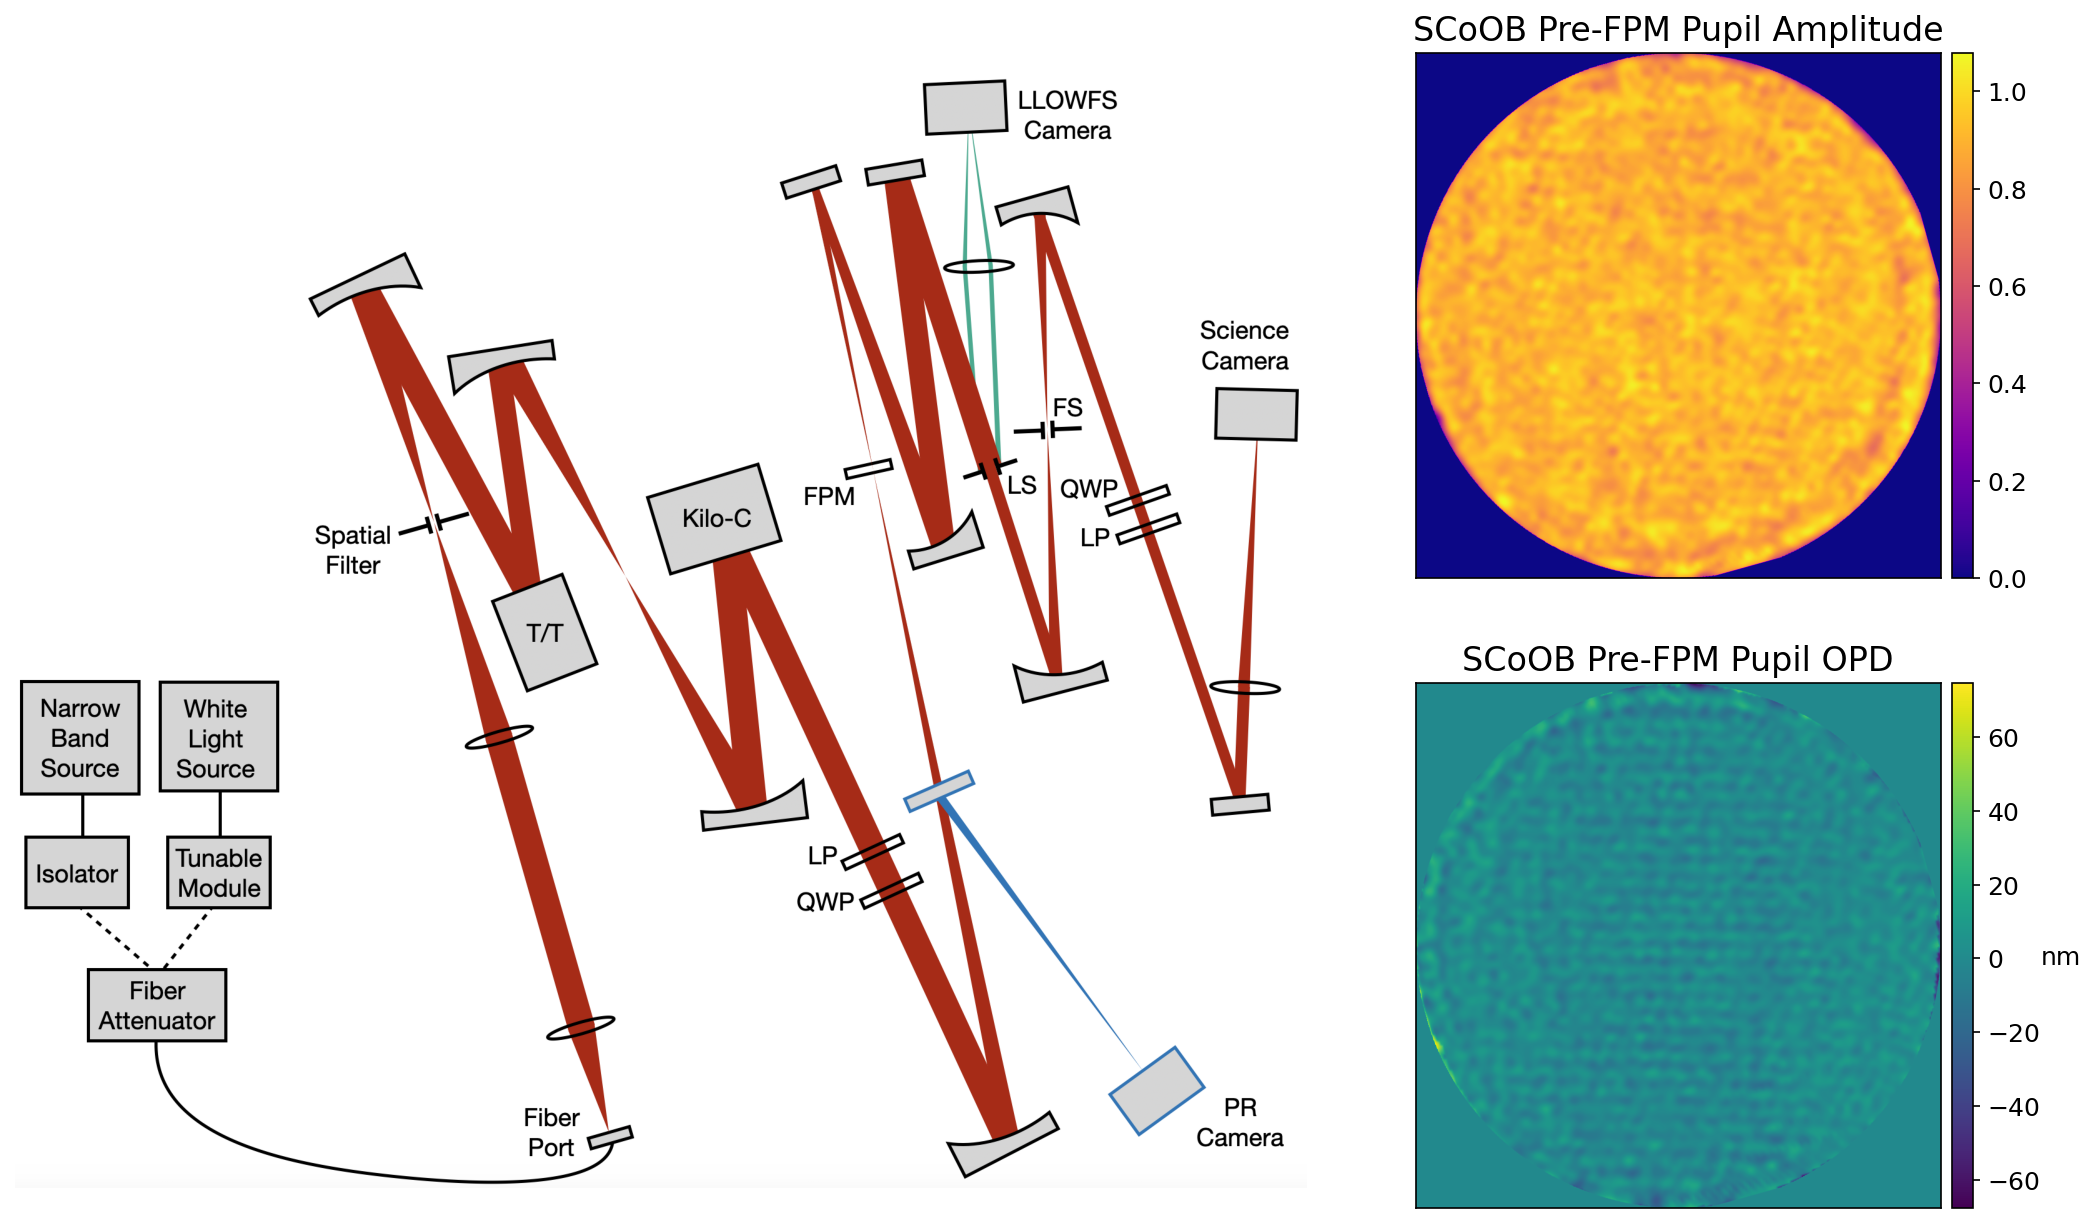

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['image.origin']='lower'
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm, Normalize
from matplotlib.gridspec import GridSpec
# Read the image
# img = np.flipud(mpimg.imread('scoob_diagram.png'))
img = np.flipud(mpimg.imread('scoob_layout.png'))

# Display the image
fig = plt.figure(figsize=(20,10), dpi=150)
gs = GridSpec(2, 2, figure=fig)

ax = fig.add_subplot(gs[:, 0])
ax.imshow(img)
ax.axis('off')  # Turn off axis labels and ticks

tfs = 16
cbarfs = 12

ax = fig.add_subplot(gs[0, 1])
im = ax.imshow( ensure_np_array(wfe_amp)/2.75, cmap='plasma')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('SCoOB Pre-FPM Pupil Amplitude', fontsize=tfs)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.075)
cbar = fig.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=cbarfs)

ax = fig.add_subplot(gs[1, 1])
im = ax.imshow( ensure_np_array(wfe_opd)*1e9, cmap='viridis')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('SCoOB Pre-FPM Pupil OPD', fontsize=tfs)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.075)
cbar = fig.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=cbarfs)
cbar.ax.set_ylabel('nm', rotation=0, labelpad=10, fontsize=cbarfs)

plt.subplots_adjust(wspace=-0.2)

fig.savefig('../figs/scoob_diagram_and_pr.pdf', format='pdf', bbox_inches="tight")

# SCoOB Results Fig

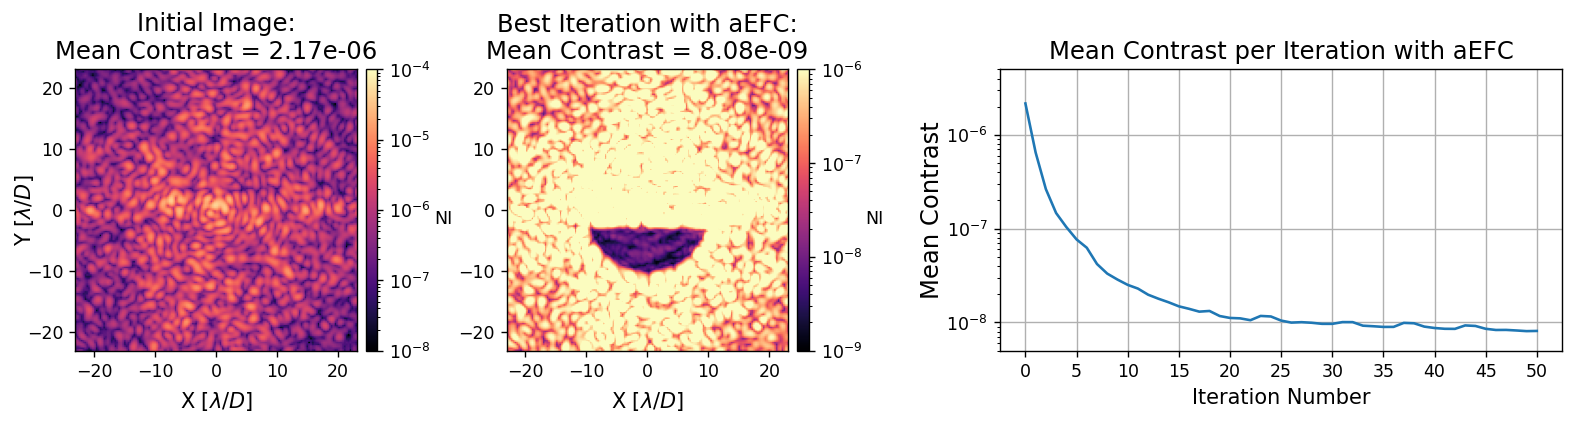

In [4]:
from aefc_vortex import imshows
reload(imshows)

old_data = utils.load_pickle('20250121_scoob_aefc_run.pkl')

imshows.plot_data_with_ref(
    old_data, 
    im1vmax=1e-4, im1vmin=1e-8, 
    im2vmax=1e-6, im2vmin=1e-9, 
    vmax=5e-6, vmin=5e-9, 
    xticks=np.arange(0, 50+1, 5),
    exp_name=' with aEFC',
    # fname='../figs/scoob_mono_aefc.pdf',
)

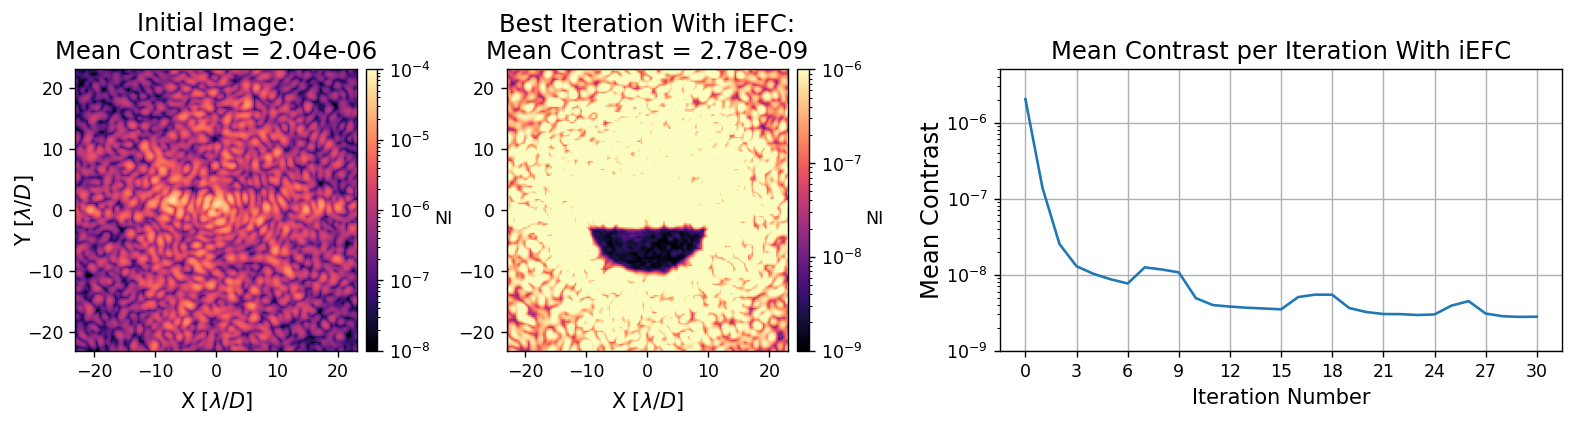

In [ ]:
from aefc_vortex import imshows
reload(imshows)

old_data = utils.load_pickle('20250123_iefc_run_2.pkl')

imshows.plot_data_with_ref(
    old_data, 
    im1vmax=1e-4, im1vmin=1e-8, 
    im2vmax=1e-6, im2vmin=1e-9, 
    vmax=5e-6, vmin=1e-9, 
    xticks=np.arange(0, 30+1, 3),
    exp_name=' With iEFC',
    # fname='../figs/scoob_mono_iefc.pdf',
)